<a href="https://colab.research.google.com/github/kelseyneis/horoscope-mining/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSCI 5523 Final project
Mohammed Guiga, Kelsey Neis, Sai Sharan Sundar, Josh Spitzer-Resnick

## imports

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_colwidth', None)
# for reading csv in Colab
# from google.colab import files
# uploaded = files.upload() # if first time uncomment this and manually load in data # use chrome not firefox, not incognito
# uploaded = files.upload()
sns.set_theme(style="darkgrid")

In [146]:
# df = pd.read_csv( io.BytesIO(uploaded['horoscope_saved.csv']) ) # nrows = 100
df = pd.read_csv("../horoscope_saved.csv")
# horoscopes = np.genfromtxt(io.BytesIO(uploaded['horoscope_saved.csv']), delimiter = ',', max_rows = 100)

In [147]:
# !pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

def sentiment_by_month(df, sign, category):
    analyzer = SentimentIntensityAnalyzer()
    filtered_df = df[(df['sign'] == sign) & (df['category'] == category)]
    sentiment = []
    x = []

    # Save sentiment scores and associated dates
    for i in range(filtered_df['date'].size):
        sentiment.append(analyzer.polarity_scores(filtered_df[i:i+1]['horoscope'])['compound'])
        x.append(filtered_df[i:i+1]['formatted_date'].dt.day)

    return (x, sentiment)

In [148]:
def high_low_sentiments(sentiment, df):
    # See high vs. low
    index_of_lowest_sentiment = np.argmin(np.array(sentiment))
    low_sent = str(df[index_of_lowest_sentiment:index_of_lowest_sentiment+1]['horoscope'])

    index_of_high_sentiment = np.argmax(np.array(sentiment))
    high_sent = str(df[index_of_high_sentiment:index_of_high_sentiment+1]['horoscope'])
    
    return (low_sent, high_sent)

In [149]:
def compare_sentiments(df, signs, category):
    df['formatted_date'] = pd.to_datetime(df['date'],format='%Y%m%d')
    df.index = df['formatted_date']
    df_grouped = df.groupby(pd.Grouper(freq='M'))
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

    fig, ax = plt.subplots(7, 2, figsize=[15,30])
    count_i = 0
    count_j = 0
    count = 0
    avgs = np.zeros((len(signs), len(df_grouped.groups)))
    month = []

    for g in df_grouped.groups:
        cur_month = months[g.month-1]
        month.append(cur_month)
        
        for i in range(len(signs)):
            x, sentiment = sentiment_by_month(df_grouped.get_group(g), signs[i], category)
            avgs[i][count] = round(np.array(sentiment).mean(), 2)
            plot_sentiment(ax[count_i][count_j], x, sentiment, signs[i], cur_month, g.year)

        # Increment axes indices
        if count_i == 6:
            count_j += 1
            count_i = 0
        else:
            count_i += 1
        count += 1

    plt.tight_layout()
    plt.show()

    # Show average sentiment by month
    sentiment_avgs = pd.DataFrame(avgs, columns = [month])
    for i in range(len(signs)):
        sentiment_avgs = sentiment_avgs.rename(index={i: signs[i]})
    sentiment_avgs['mean'] = round(sentiment_avgs.mean(axis=1), 2)
    display(sentiment_avgs)

In [150]:
def plot_sentiment(ax, x, sentiment, sign, month, year):
    ax.plot(x, sentiment, label=sign)
    ax.set_xlabel("Date")
    ax.set_ylabel("Sentiment rating")
    ax.set_title(f"Sentiment in {month}, {year}")
    ax.legend(loc=4)

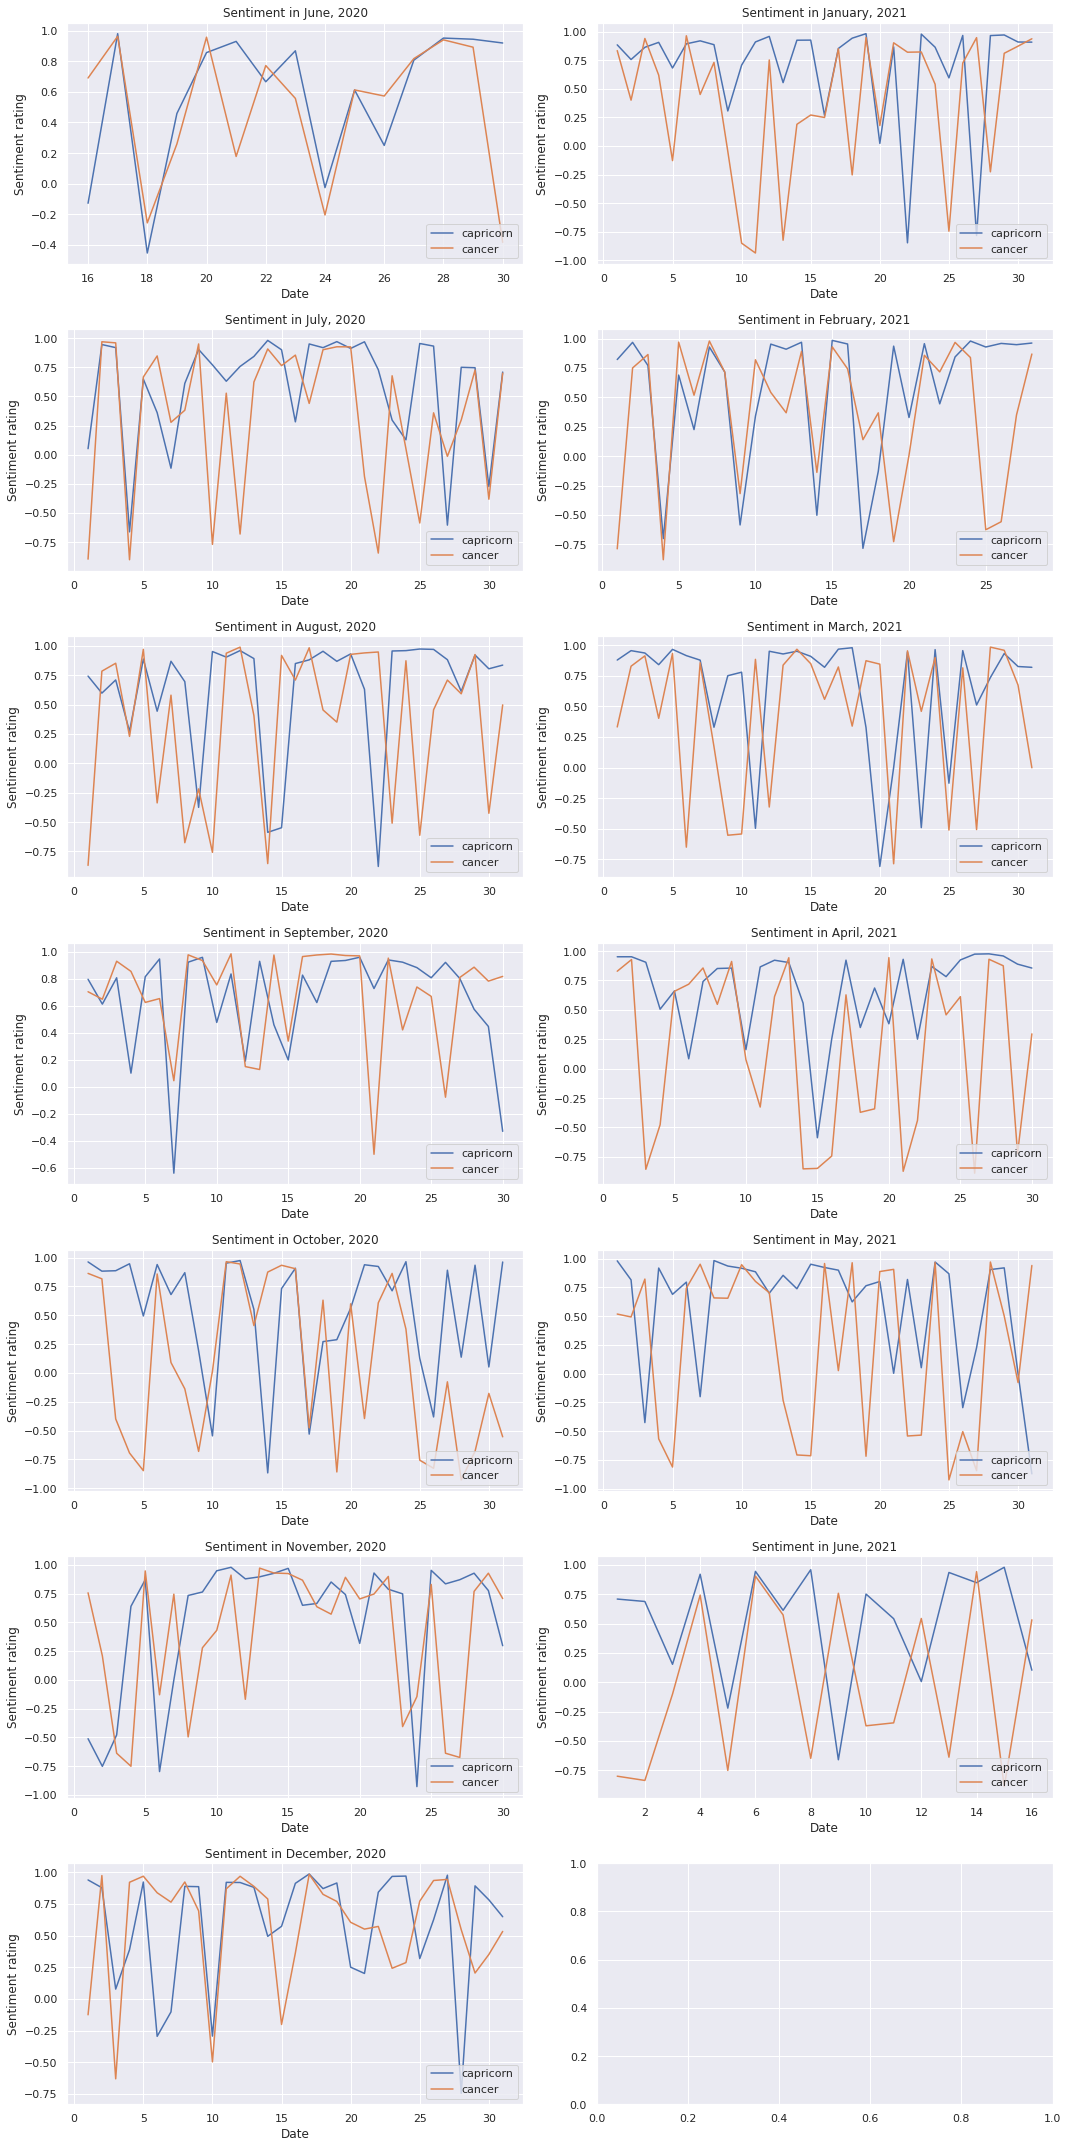

June  July August September October November December January  \
capricorn  0.58  0.58  0.63   0.65      0.53    0.52     0.60     0.70     
cancer     0.49  0.31  0.35   0.67      0.07    0.39     0.57     0.38     

          February March April   May  June  mean  
capricorn  0.57     0.64  0.68  0.59  0.52  0.60  
cancer     0.36     0.43  0.17  0.23 -0.02  0.34

In [139]:
compare_sentiments(df, ('capricorn', 'cancer'), 'general')

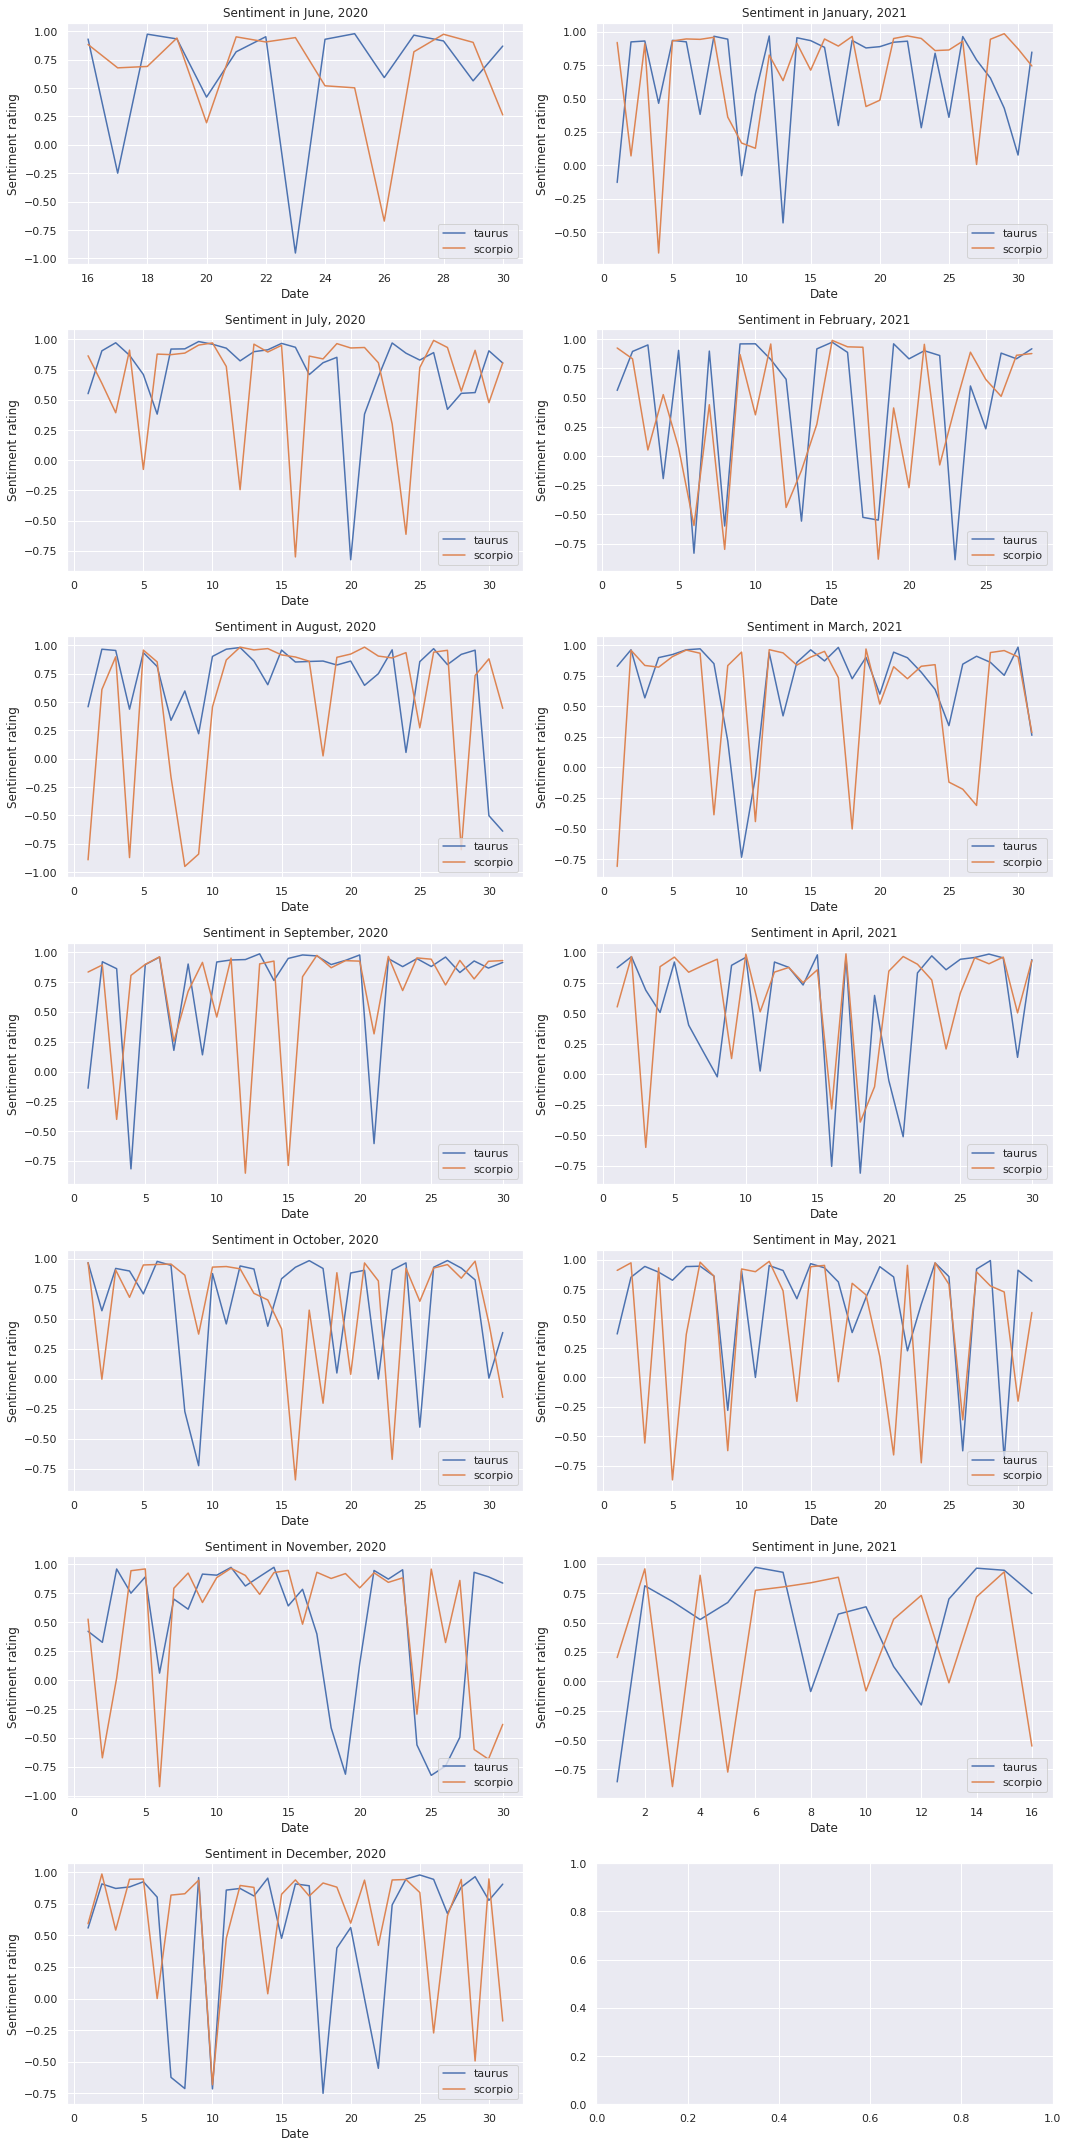

June  July August September October November December January  \
taurus   0.64  0.74  0.68   0.72      0.64    0.46     0.55     0.65     
scorpio  0.63  0.66  0.50   0.67      0.59    0.52     0.61     0.70     

        February March April   May  June  mean  
taurus   0.47     0.70  0.56  0.66  0.51  0.61  
scorpio  0.38     0.57  0.64  0.44  0.37  0.56

In [140]:
compare_sentiments(df, ('taurus', 'scorpio'), 'general')


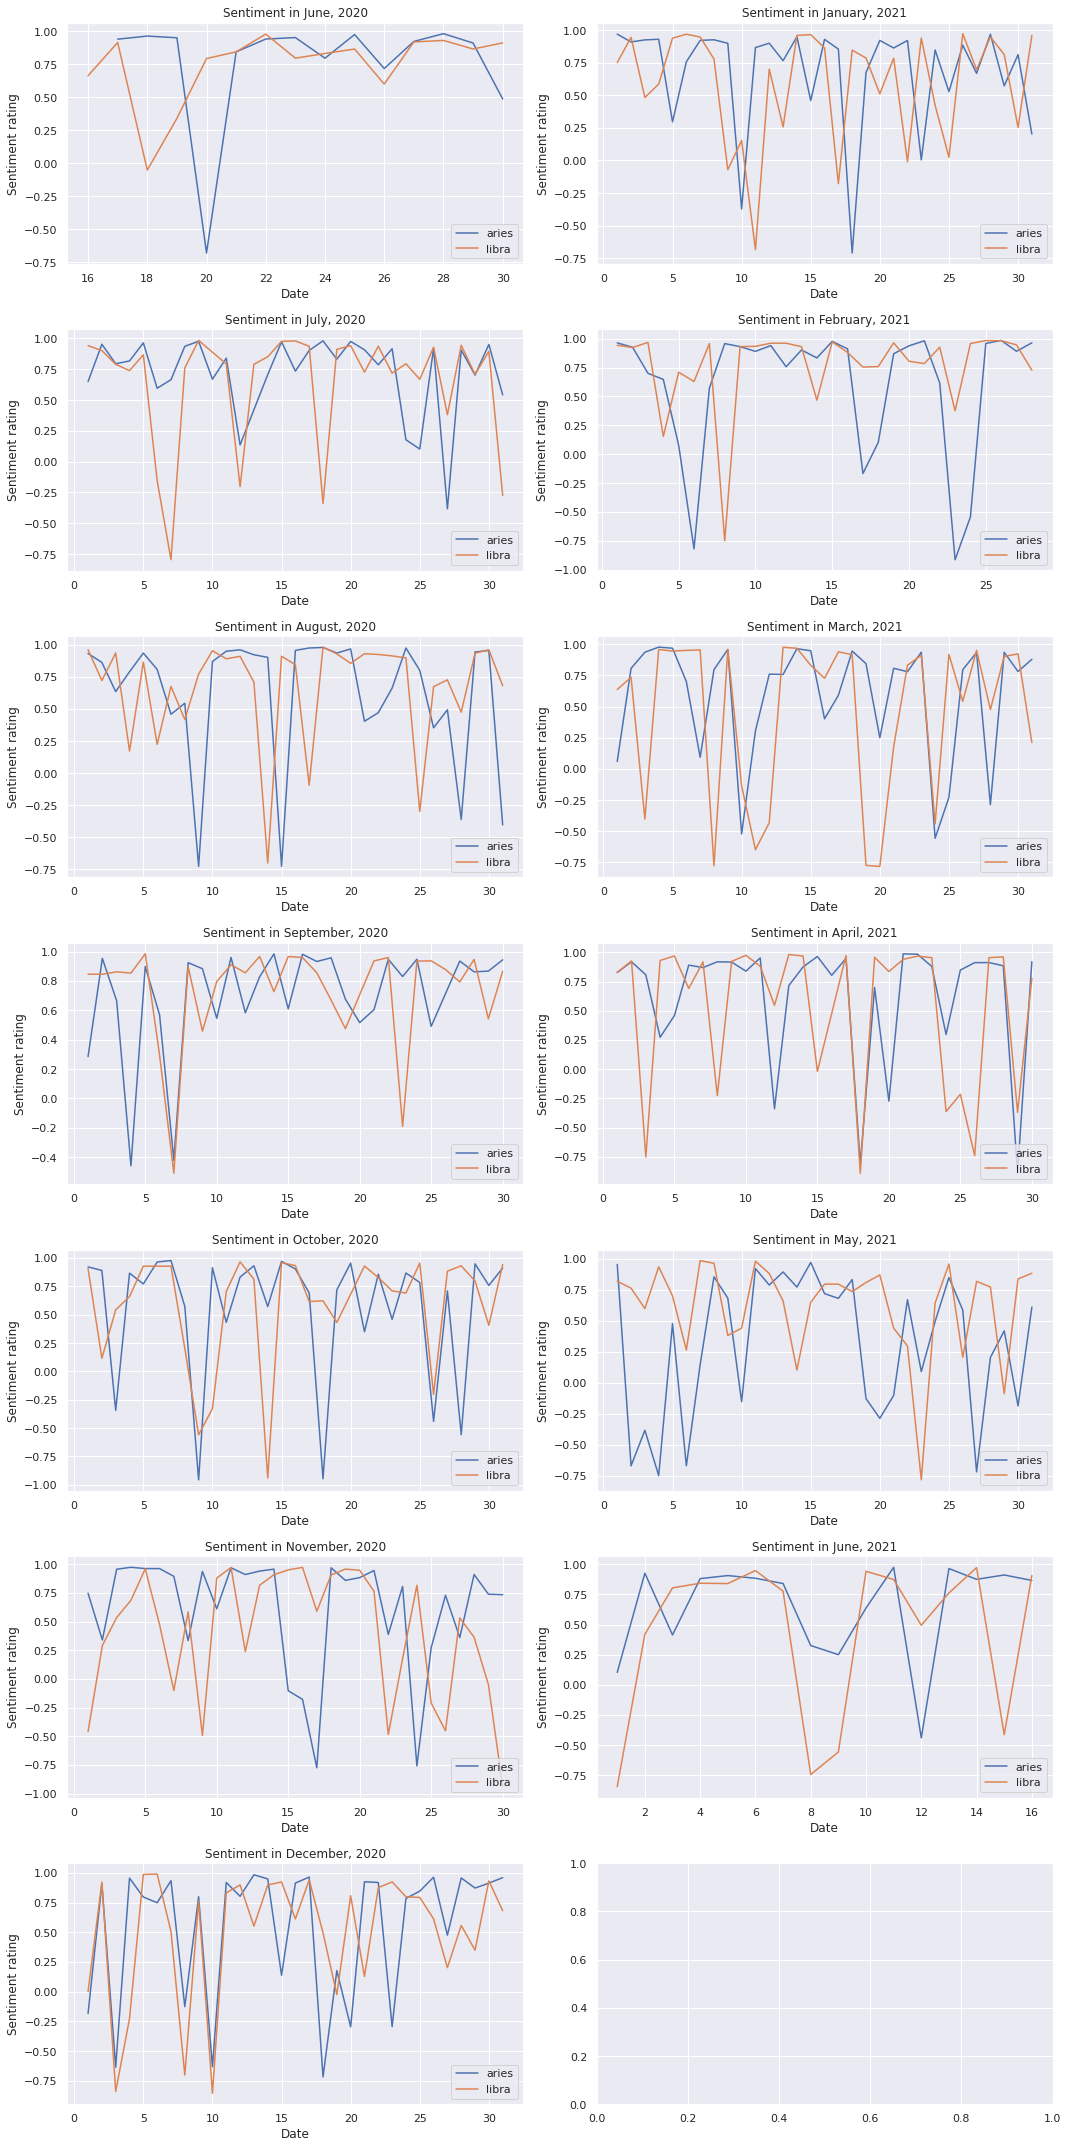

June  July August September October November December January February  \
aries  0.76  0.71  0.62   0.70      0.56    0.61     0.54     0.68    0.60      
libra  0.75  0.65  0.67   0.73      0.58    0.41     0.49     0.59    0.77      

      March April   May  June  mean  
aries  0.59  0.63  0.31  0.64  0.61  
libra  0.45  0.53  0.62  0.44  0.59

In [141]:
compare_sentiments(df, ('aries', 'libra'), 'general')

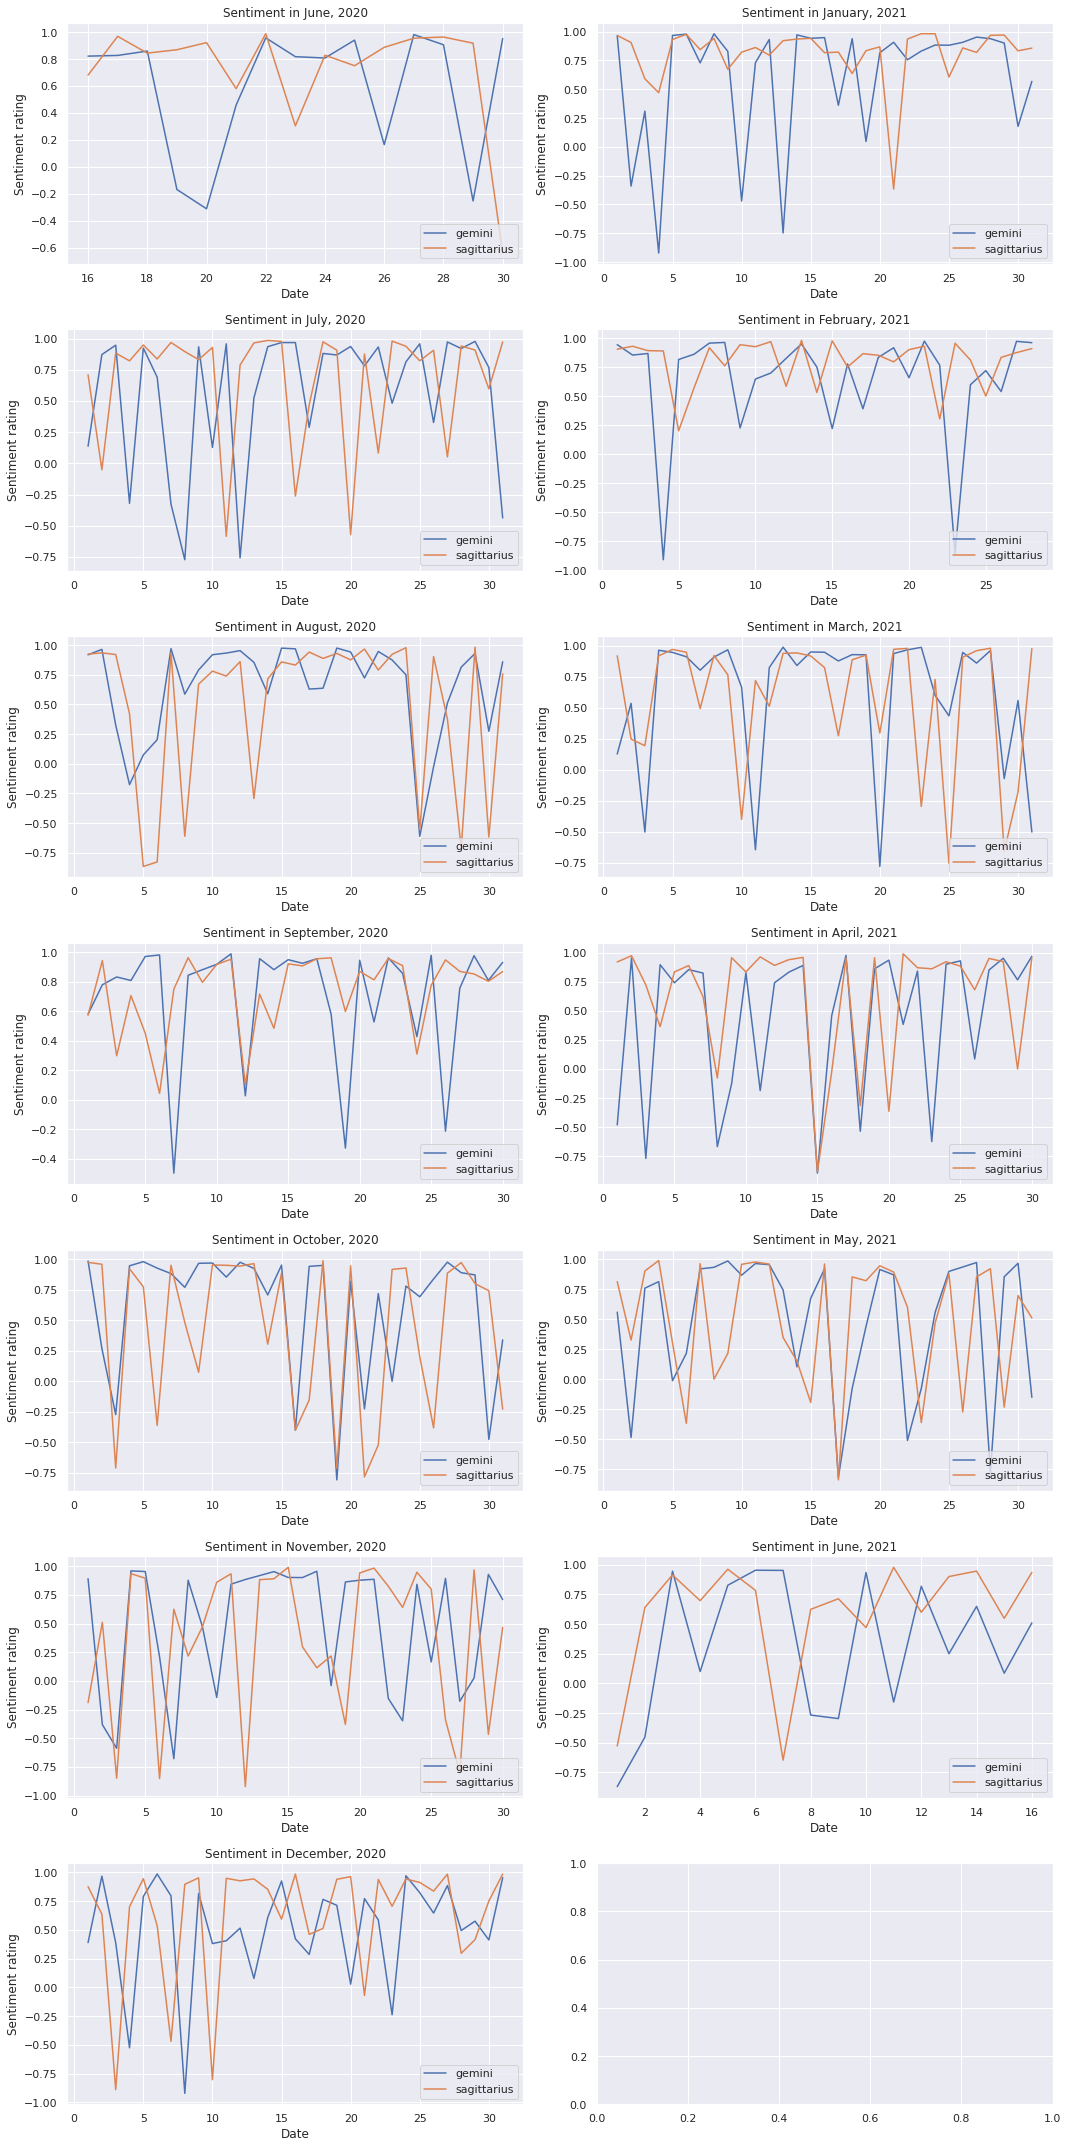

June  July August September October November December January  \
gemini       0.58  0.56  0.65   0.70      0.61    0.48     0.51     0.60     
sagittarius  0.72  0.66  0.50   0.73      0.43    0.35     0.62     0.81     

            February March April   May  June  mean  
gemini       0.64     0.61  0.44  0.48  0.31  0.55  
sagittarius  0.80     0.57  0.64  0.48  0.60  0.61

In [142]:
compare_sentiments(df, ('gemini', 'sagittarius'), 'general')

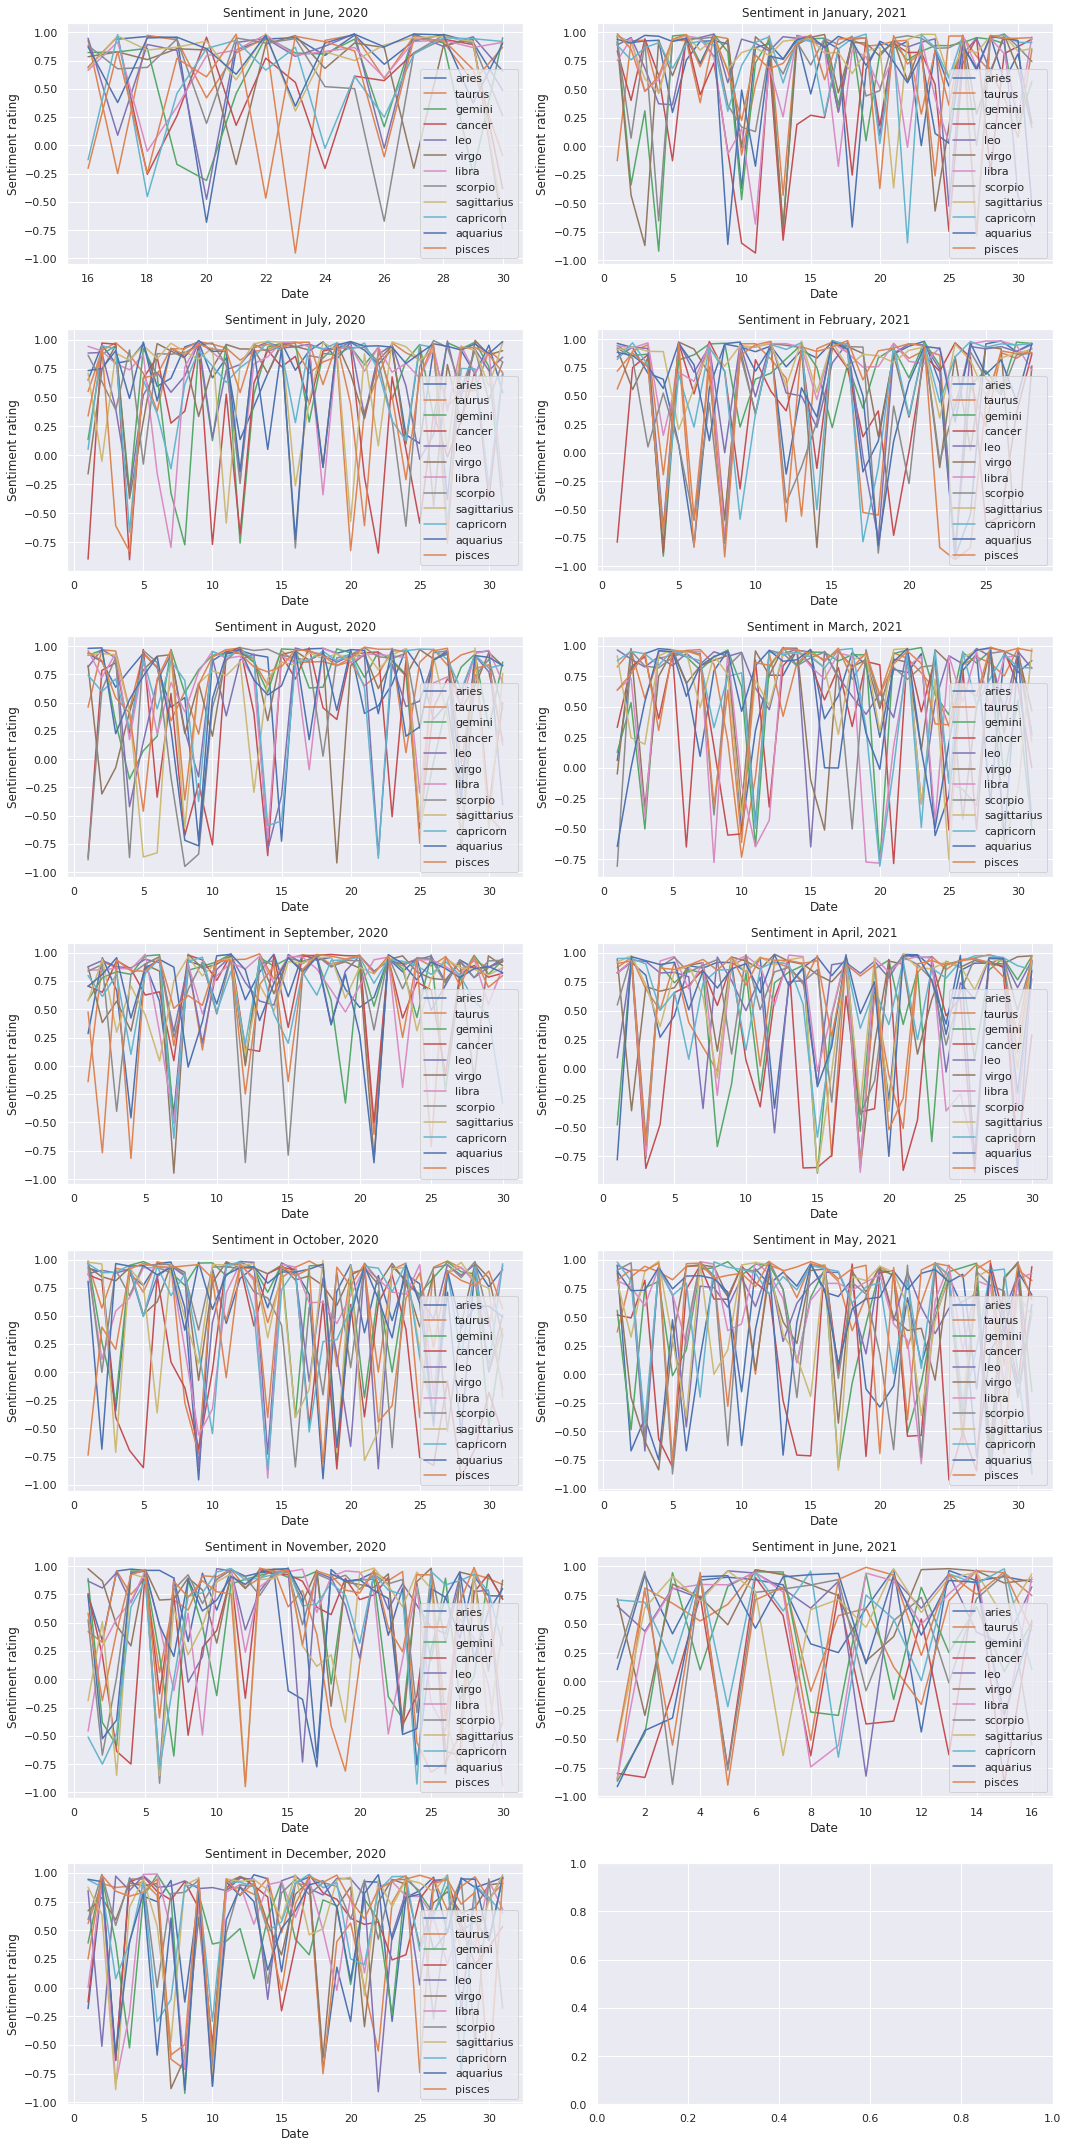

June  July August September October November December January  \
aries        0.76  0.71  0.62   0.70      0.56    0.61     0.54     0.68     
taurus       0.64  0.74  0.68   0.72      0.64    0.46     0.55     0.65     
gemini       0.58  0.56  0.65   0.70      0.61    0.48     0.51     0.60     
cancer       0.49  0.31  0.35   0.67      0.07    0.39     0.57     0.38     
leo          0.68  0.69  0.50   0.81      0.54    0.57     0.68     0.67     
virgo        0.61  0.63  0.65   0.66      0.73    0.66     0.55     0.56     
libra        0.75  0.65  0.67   0.73      0.58    0.41     0.49     0.59     
scorpio      0.63  0.66  0.50   0.67      0.59    0.52     0.61     0.70     
sagittarius  0.72  0.66  0.50   0.73      0.43    0.35     0.62     0.81     
capricorn    0.58  0.58  0.63   0.65      0.53    0.52     0.60     0.70     
aquarius     0.80  0.73  0.58   0.70      0.63    0.55     0.51     0.67     
pisces       0.49  0.58  0.67   0.64      0.55    0.57     0.57     0.70     

            February March April   May  June  mean  
aries        0.60     0.59  0.63  0.31  0.64  0.61  
taurus       0.47     0.70  0.56  0.66  0.51  0.61  
gemini       0.64     0.61  0.44  0.48  0.31  0.55  
cancer       0.36     0.43  0.17  0.23 -0.02  0.34  
leo          0.59     0.72  0.67  0.51  0.63  0.64  
virgo        0.51     0.58  0.70  0.40  0.70  0.61  
libra        0.77     0.45  0.53  0.62  0.44  0.59  
scorpio      0.38     0.57  0.64  0.44  0.37  0.56  
sagittarius  0.80     0.57  0.64  0.48  0.60  0.61  
capricorn    0.57     0.64  0.68  0.59  0.52  0.60  
aquarius     0.63     0.50  0.58  0.63  0.43  0.61  
pisces       0.45     0.73  0.72  0.73  0.43  0.60

In [143]:
signs = ['aries', 'taurus', 'gemini', 'cancer', 'leo', 'virgo', 'libra', 'scorpio', 'sagittarius', 'capricorn', 'aquarius', 'pisces']
compare_sentiments(df, signs, 'general')